# 绘图和可视化

进行信息丰富的可视化（有时称为绘图）是数据分析中最重要的任务之一。它可能是探索过程的一部分，例如，帮助识别异常值或所需的数据转换，或作为生成模型想法的方式。 对于其他人而言，为网页构建交互式可视化可能是最终目标。 Python有许多用于进行静态或动态可视化的附加库，但我将主要关注matplotlib及其基础上的库。

matplotlib是一个桌面绘图软件包，旨在创建（主要是二维的）出版质量的绘图。该项目由John Hunter于2002年启动，旨在在Python中启用类似于MATLAB的绘图界面。matplotlib和IPython社区已经合作简化了IPython shell（现在是Jupyter笔记本）中的交互式绘图。matplotlib在所有操作系统上都支持各种GUI后端，并且还可以将可视化导出到所有常见的矢量和栅格图形格式（PDF，SVG，JPG，PNG，BMP，GIF等）。除了一些图表外，本书中几乎所有图形都是使用matplotlib制作的。

随着时间的推移，matplotlib催生了许多用于数据可视化的附加工具箱，这些工具箱使用matplotlib进行基础绘图。其中之一是seaborn，我们将在本章后面探讨。

遵循本章中的代码示例的最简单方法是在Jupyter笔记本中使用交互式绘图。要进行设置，请在Jupyter笔记本中执行以下语句：

In [1]:
%matplotlib notebook

## 9.1 简单的matplotlib API入门

对于matplotlib，我们使用以下导入约定：

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)

In [3]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


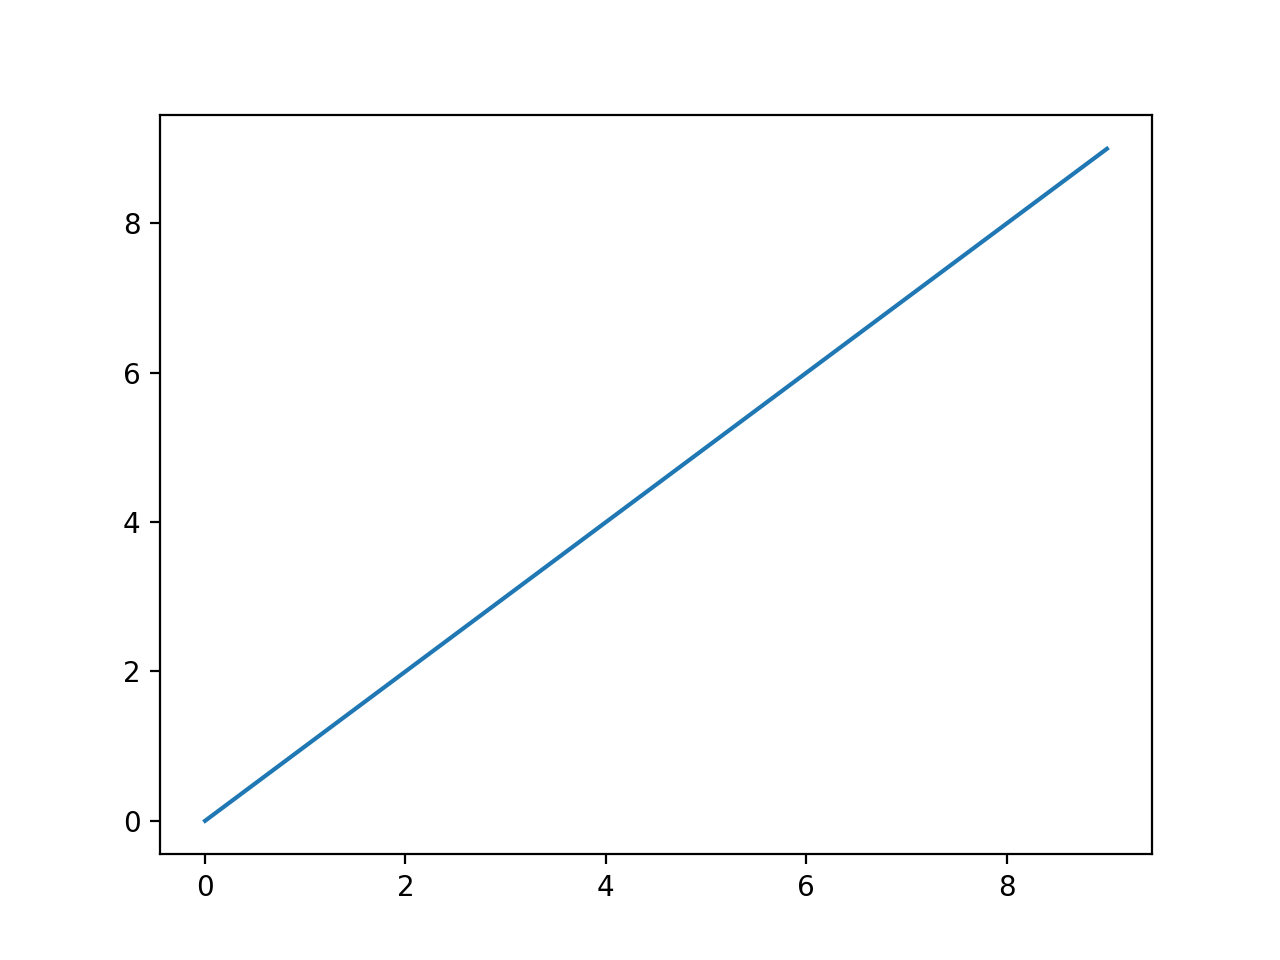

In [4]:
plt.plot(data)

虽然像seaborn和pandas的内置绘图功能之类的库将处理制作绘图的许多普通细节，但如果您希望在提供的功能选项之外对其进行自定义，则需要了解有关matplotlib API的一些知识。

> 注意：书中没有足够的空间来全面讨论matplotlib中功能的广度和深度。足以教您如何起床并运行。 matplotlib库和文档是学习高级功能的最佳资源。

### 图和子图

matplotlib中的图位于Figure对象中。您可以使用plt.figure来创建一个新的图：

<IPython.core.display.Javascript object>


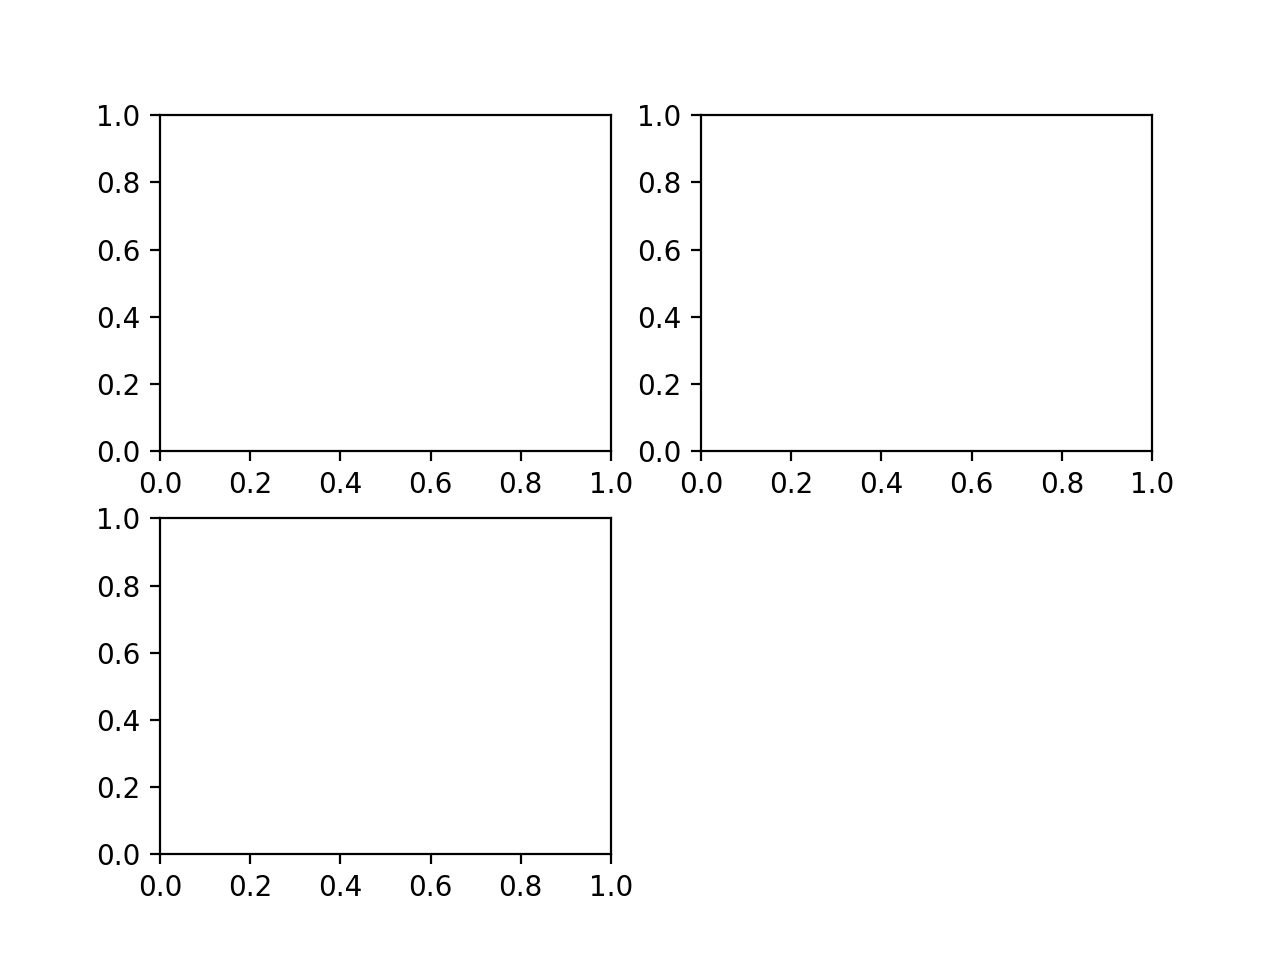

In [5]:
fig = plt.figure()

在IPython中，将出现一个空的绘图窗口，但是在Jupyter中，直到我们使用更多命令之前，什么都不会显示。plt.figure有很多选择；值得注意的是，如果将其保存到磁盘，figsize将保证该图形具有一定的尺寸和纵横比。

您无法使用空白图形进行绘图。您必须使用add_subplot创建一个或多个子图：

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

这意味着该图应为2×2（总共最多四个图），并且我们选择四个子图中的第一个（从1编号）。如果创建接下来的两个子图，最终将得到如图9-2所示的可视化效果：

In [7]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

> 注意：使用Jupyter笔记本的一个细微差别是，在评估了每个单元格之后便会重设绘图，因此对于更复杂的绘图，必须将所有绘图命令放在单个笔记本电脑单元中。

在这里，我们在同一单元格中运行所有这些命令：

<IPython.core.display.Javascript object>


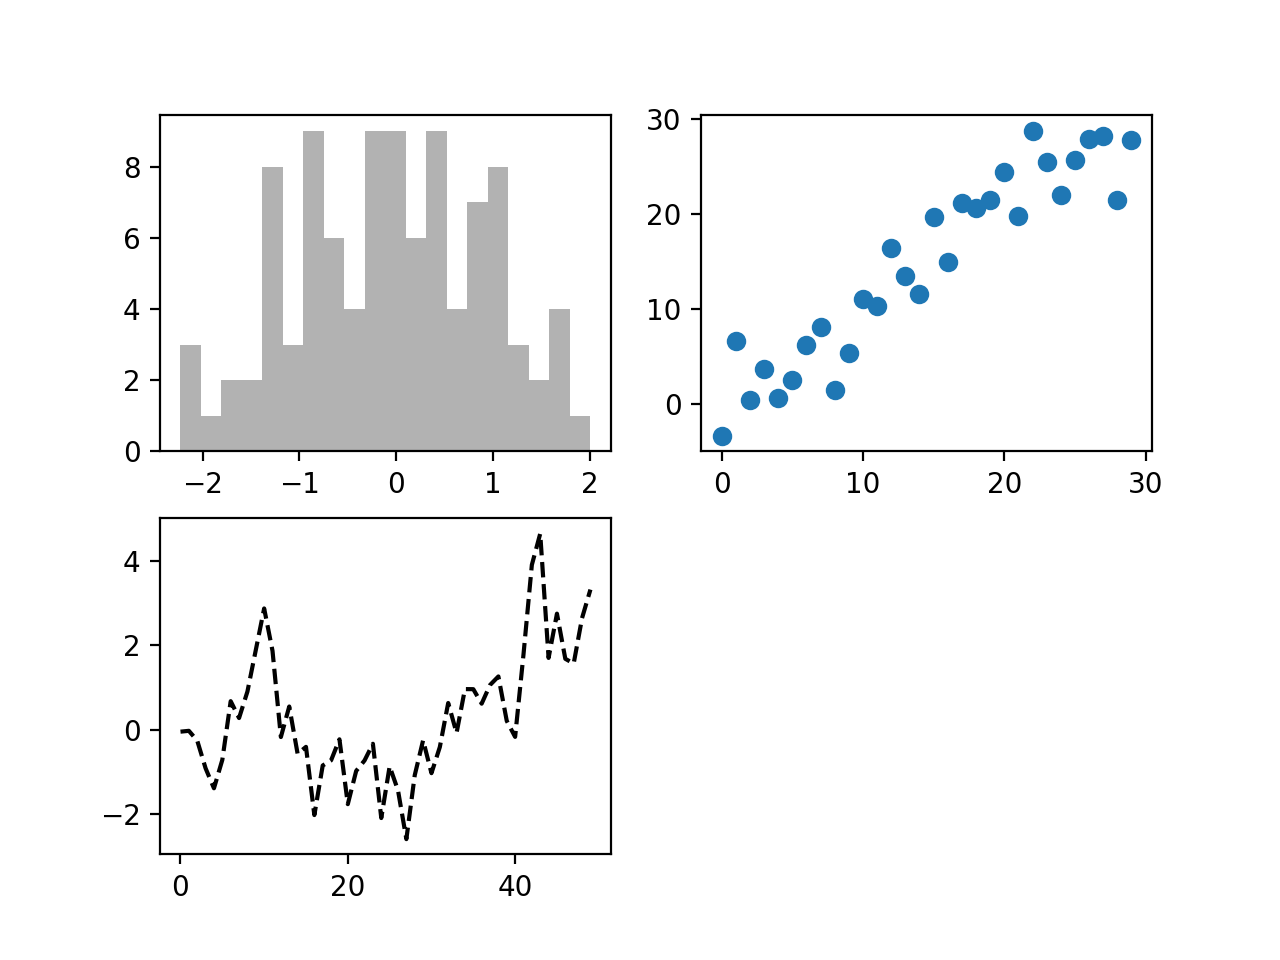

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

发出诸如plt.plot([1.5，3.5，-2，1.6])之类的绘图命令时，matplotlib会使用最后使用的图形和子图（如有必要，创建一个子图），从而隐藏图形和子图的创建。 因此，如果我们添加以下命令，您将得到如图9-3所示的内容：

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

'k--'是一种样式选项，指示matplotlib绘制黑色虚线。这里由fig.add_subplot返回的对象是AxesSubplot对象，可以通过调用每个对象的实例方法直接在其上绘制其他空子图（见图9-4）：

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [11]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

您可以在matplotlib文档中找到完整的绘图类型目录。

用子图网格创建图形是一项非常常见的任务，因此matplotlib包含一个便捷方法plt.subplots，该方法创建一个新图并返回一个包含创建的子图对象的NumPy数组：

<IPython.core.display.Javascript object>


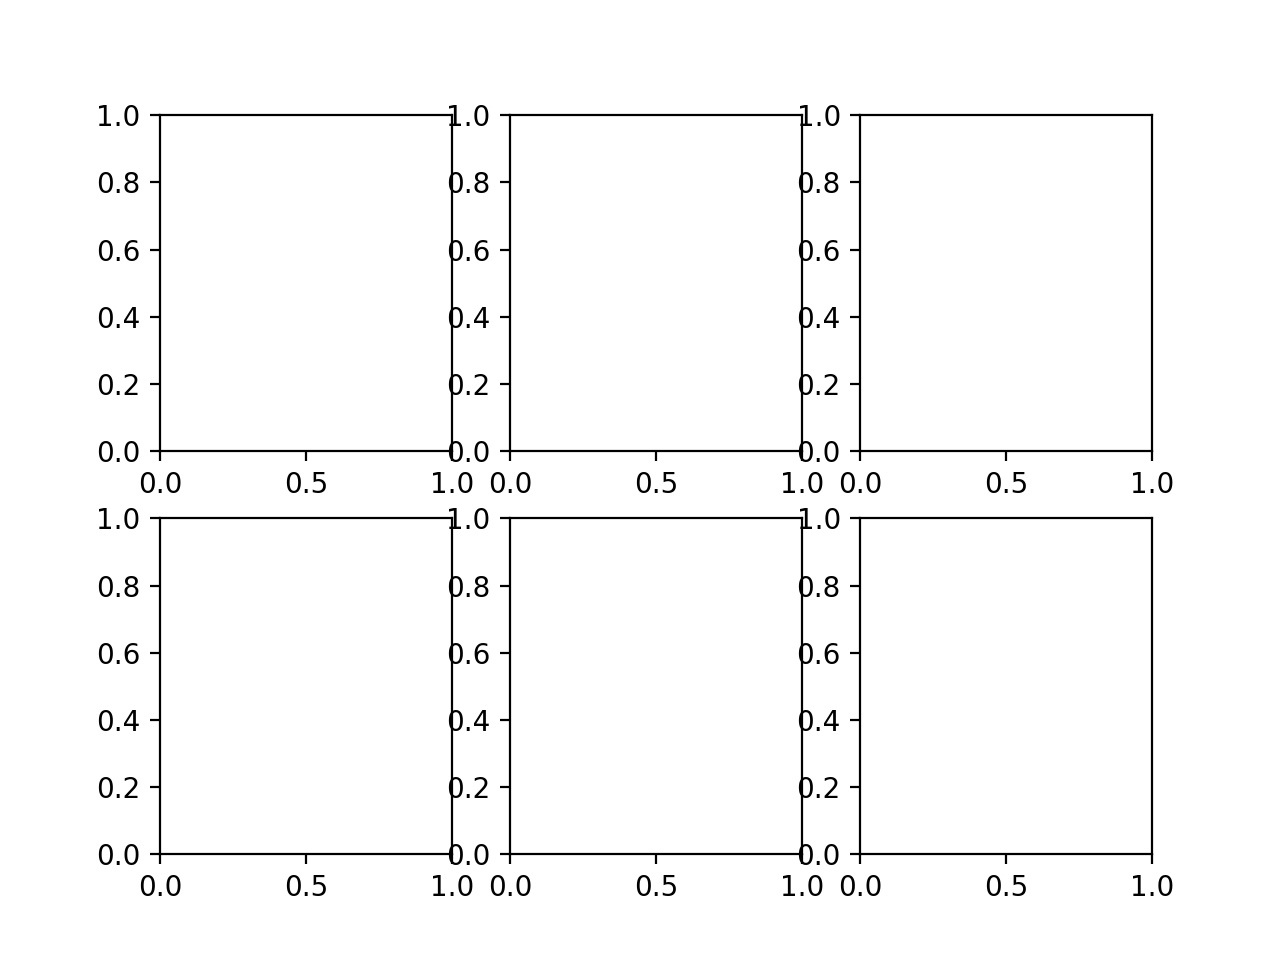

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd86db85fd0>,
      dtype=object)

In [12]:
fig, axes = plt.subplots(2, 3)

axes

这非常有用，因为axes数组可以像二维数组一样轻松地索引； 例如，axes[0, 1]。 您还可以使用sharex和sharey分别指示子图具有相同的x轴或y轴。当您比较相同规模的数据时，此功能特别有用；否则，matplotlib将自动缩放绘图限制。有关此方法的更多信息，请参见表9-1。


#### 调整子图周围的间距

默认情况下，matplotlib在子图的外部和子图之间的间距周围留有一定数量的填充。相对于图的高度和宽度均指定了该间距，因此，如果您使用GUI窗口以编程方式或手动调整图的大小，则图将自动进行调整。您可以使用Figure对象上的subplots_adjust方法来更改间距，该方法也可以作为顶层函数使用：

```python
    subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=None)
```

wspace和hspace分别控制图形宽度和图形高度的百分比，以用作子图之间的间距。这是一个小示例，其中我将间距一直缩小到零（见图9-5）：

<IPython.core.display.Javascript object>


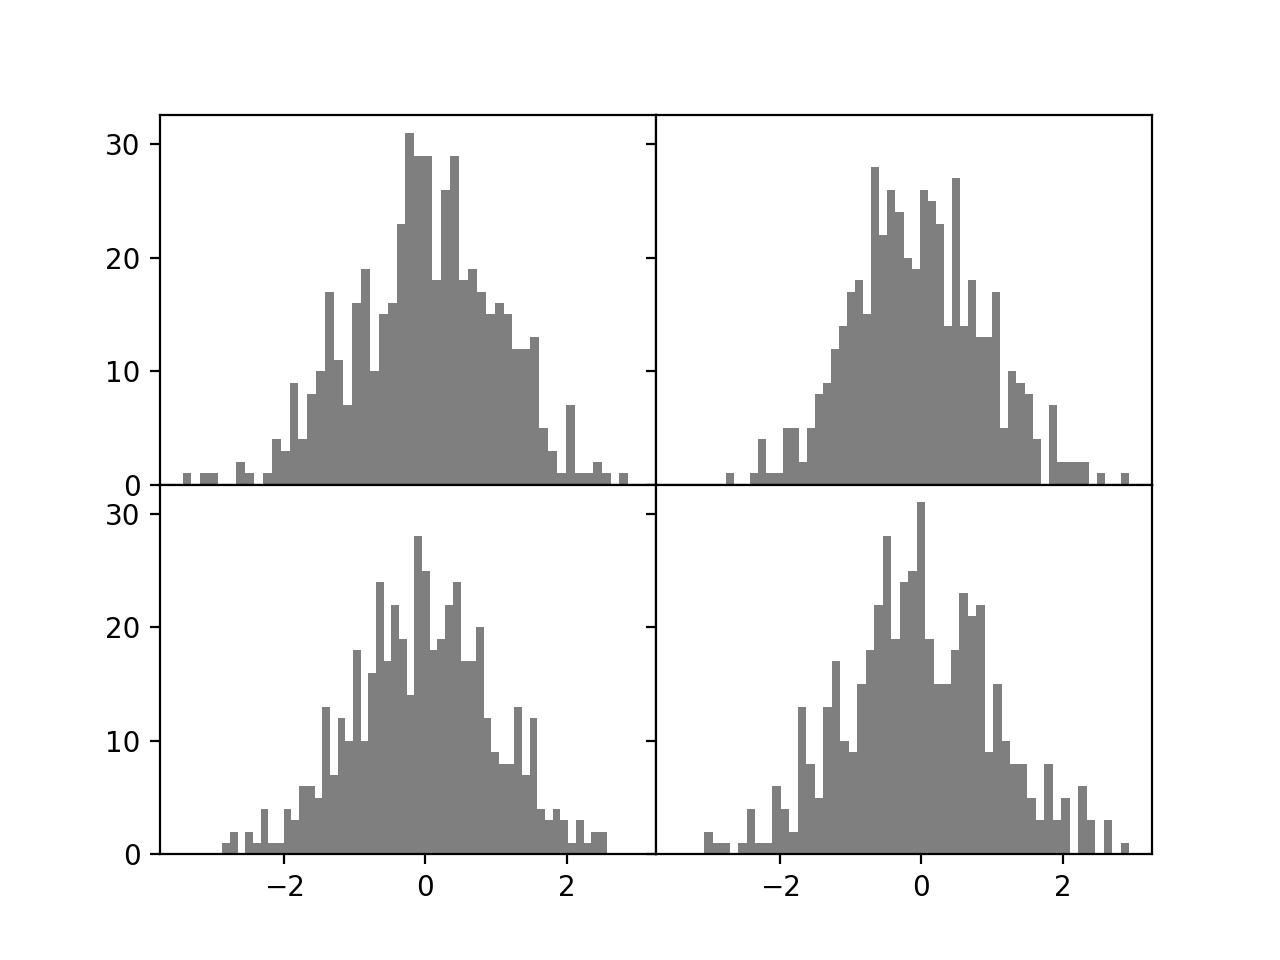

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

您可能会注意到轴标签重叠。matplotlib不会检查标签是否重叠，因此在这种情况下，您需要自己指定明确的刻度位置和刻度标签来修复标签（我们将在以下部分中介绍如何操作）。

### 颜色，标记和线条样式

Matplotlib的主要绘图功能接受x和y坐标数组，并可以选择表示颜色和线条样式的字符串缩写。例如，要绘制带有绿色破折号的x对y，可以执行以下命令：

```python
    ax.plot(x, y, 'g--')
```

为方便起见，提供了在字符串中同时指定颜色和线条样式的这种方式；在实践中，如果您以编程方式创建图，则可能不希望将字符串混合在一起以创建具有所需样式的图。同一图也可以更明确地表示为：

```python
    ax.plot(x, y, linestyle='--', color='g')
```

常用颜色提供了多种颜色缩写，但是您可以通过指定其十六进制代码（例如'#CECECE'）在光谱上使用任何颜色。您可以通过查看图的文档字符串（在IPython或Jupyter中使用plot？）来查看整套线型。

线图还可以具有标记以突出显示实际数据点。 由于matplotlib创建了在点之间插值的连续线图，因此有时可能不清楚点在哪里。 标记可以是样式字符串的一部分，该字符串必须具有颜色，然后是标记类型和线条样式（请参见图9-6）：

<IPython.core.display.Javascript object>


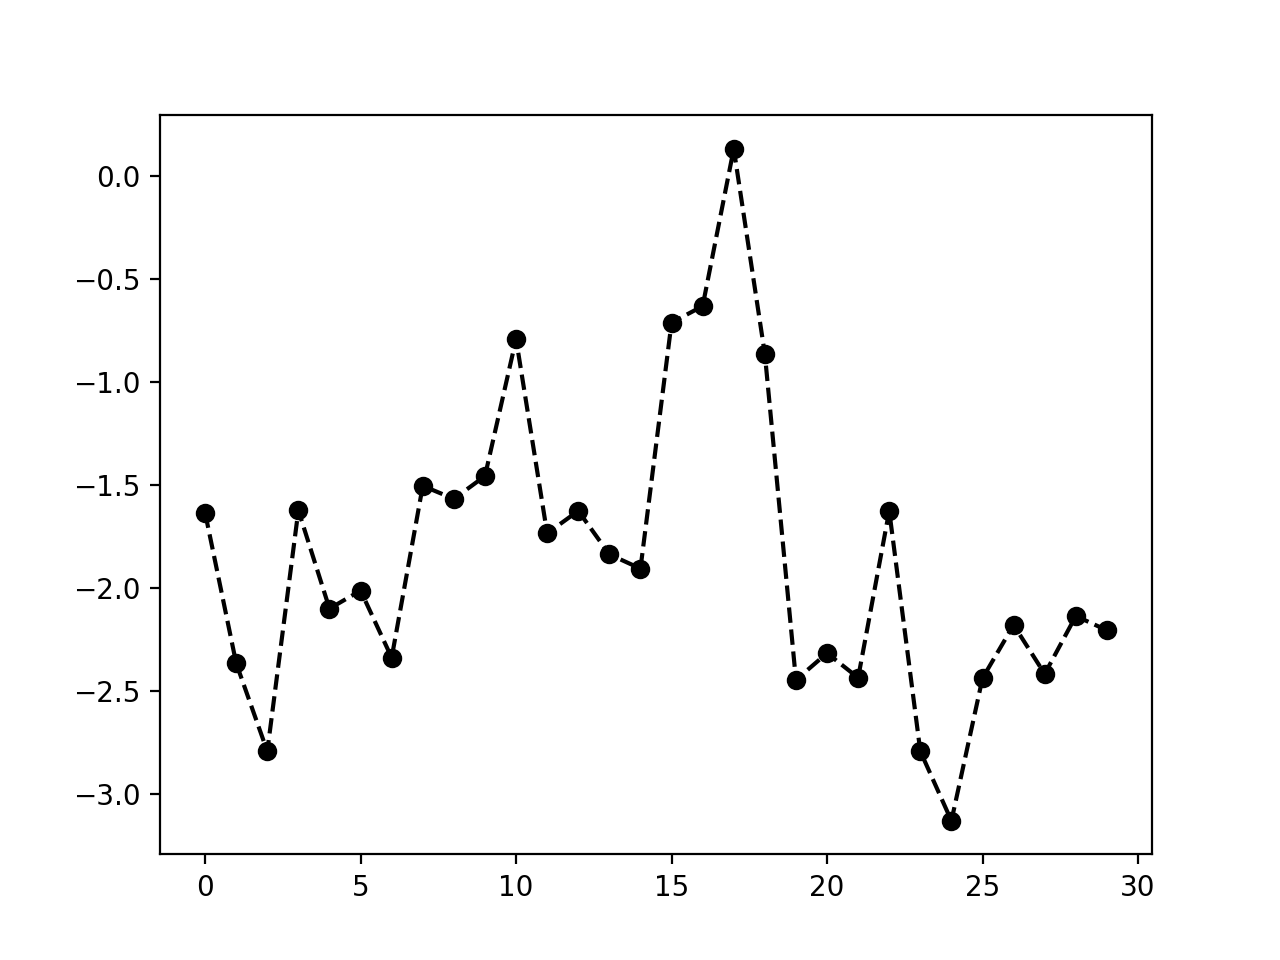

In [14]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

这也可以更明确地写为：

```python
    plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

对于线图，您会注意到默认情况下后续点是线性插值的。可以使用drawstyle选项对此进行更改（图9-7）：

In [15]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


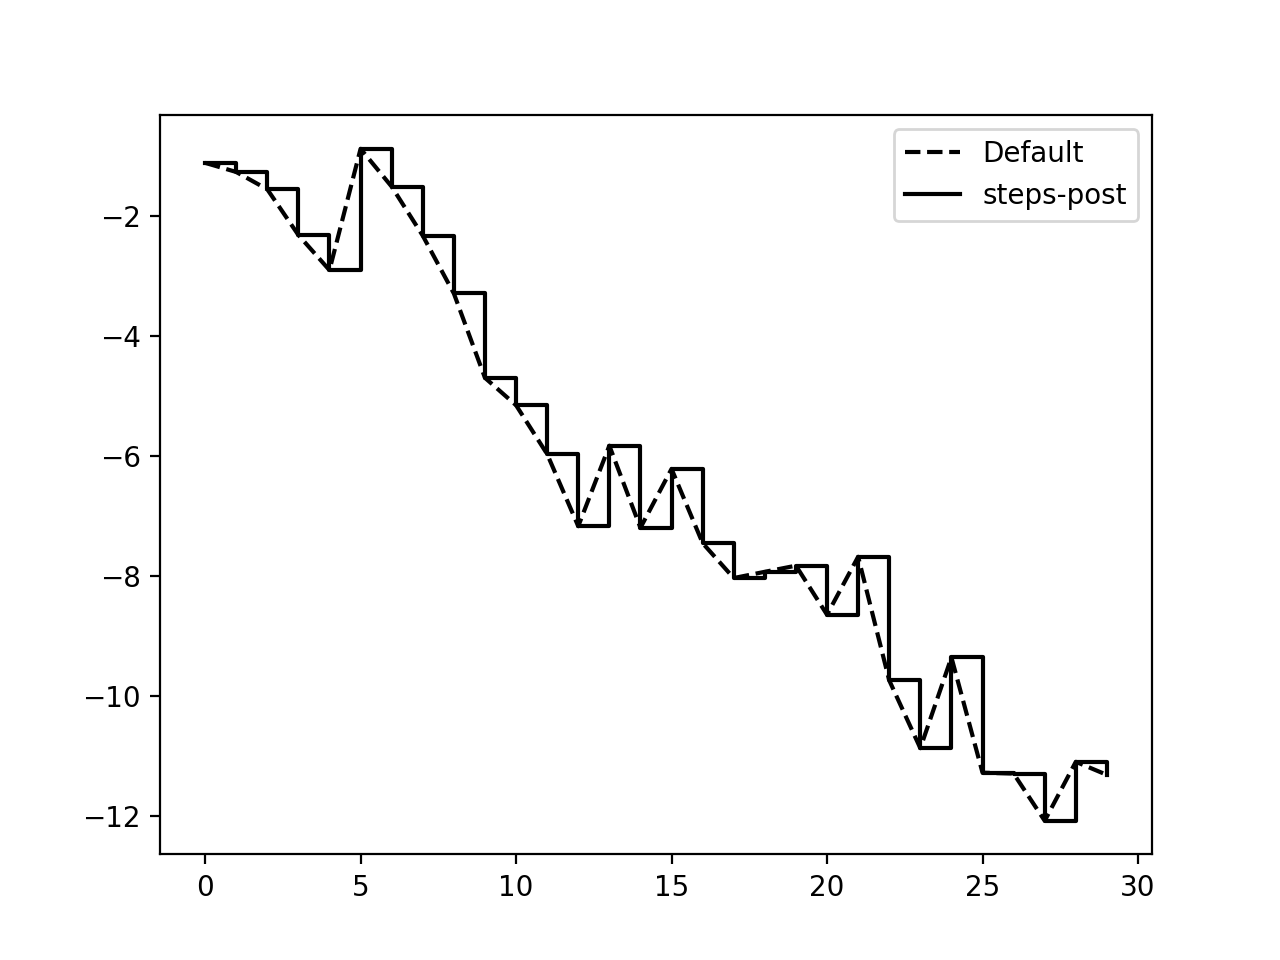

In [16]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

运行此命令时，您可能会注意到类似<matplotlib.lines.Line2D at ...>的输出。 matplotlib返回引用刚添加的图子组件的对象。很多时候，您可以放心地忽略此输出。在这里，由于我们将标签参数传递给绘图，因此我们能够创建绘图图例以使用plt.legend标识每条线。

> 注意：无论是否在绘制数据时传递了标签选项，都必须调用plt.legend（或ax.legend，如果您有轴的引用）来创建图例。

### 刻度，标签和图例

对于大多数类型的绘图装饰，主要有两种处理方法：使用面向过程的pyplot接口（即matplotlib.pyplot）和面向对象的本机matplotlib API。

pyplot界面旨在供交互式使用，由xlim，xticks和xticklabels之类的方法组成。这些分别控制绘图范围，刻度位置和刻度标签。它们可以以两种方式使用：

- 调用时不带参数返回当前参数值（例如，plt.xlim（）返回当前x轴绘图范围）
- 用参数调用可设置参数值（例如plt.xlim（[0，10]），将x轴范围设置为0到10）

所有这些方法都作用于活动的或最近创建的AxesSubplot。它们每个都对应于子图对象本身上的两个方法。对于xlim，它们是ax.get_xlim和ax.set_xlim。我更愿意自己使用subplot实例方法，以便明确（特别是在处理多个子图时），但是您当然可以使用任何更方便的方法。

#### 设置标题，轴标签，刻度和刻度标签

为了说明如何自定义轴，我将创建一个简单的图形和随机游走图（请参见图9-8）：

<IPython.core.display.Javascript object>


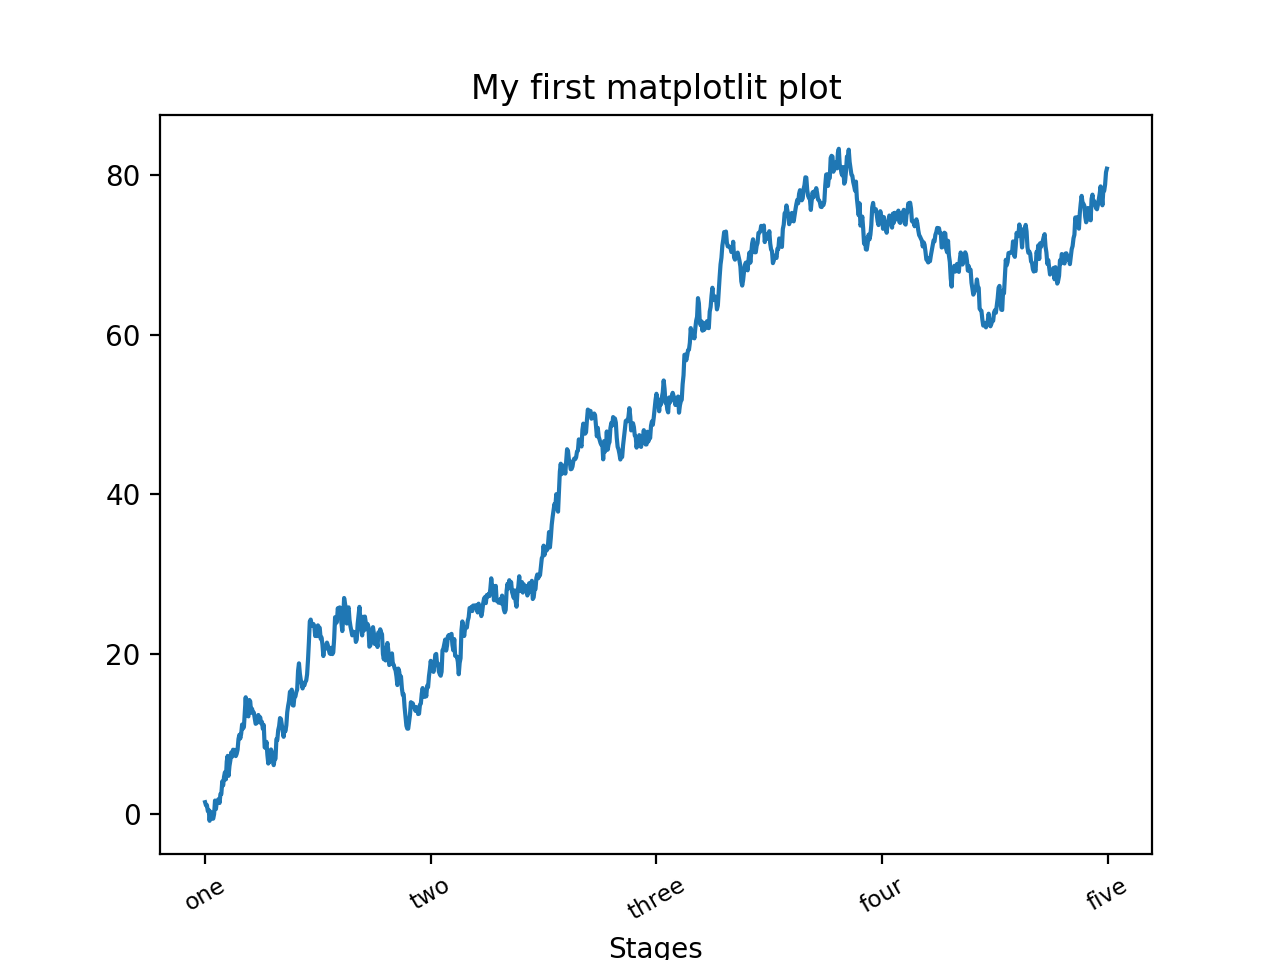

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

要更改x轴刻度，最简单的方法是使用set_xticks和set_xticklabel。前者指示matplotlib沿着数据范围在哪里放置刻度线；默认情况下，这些位置也将成为标签。但是我们可以使用set_xticklabels将其他任何值设置为标签：

In [19]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [20]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

旋转选项将x刻度标签设置为30度旋转。最后，set_xlabel为x轴命名，set_title为子图标题（结果图见图9-9）：

In [21]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1, 'My first matplotlib plot')

In [23]:
ax.set_xlabel('Stages')

Text(0.5, 24.188360157402354, 'Stages')

修改y轴包含相同的过程，在上述步骤中将y替换为x。axes类有一个set方法，该方法允许批量设置图属性。从前面的示例中，我们还可以编写：

In [24]:
props = {
    'title': 'My first matplotlit plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 24.188360157402354, 'Stages'),
 Text(0.5, 1, 'My first matplotlit plot')]

#### 添加图例

图例是用于识别绘图元素的另一个关键元素。有两种添加方法。最简单的方法是在添加每幅图时传递label参数：

In [25]:
from numpy.random import randn

# fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

完成此操作后，您可以调用ax.legend（）或plt.legend（）自动创建图例。结果图如图9-10所示：

In [31]:
ax.legend(loc='best')

图例方法还有其他几个用于loc loc参数的选择。有关更多信息，请参见文档字符串（使用ax.legend？）。

loc告诉matplotlib放置绘图的位置。 如果您不挑剔，最好选择“最佳”，因为它会选择最远离的位置。 要从图例中排除一个或多个元素，请不要传递label或label ='_nolegend_'。

### 子图上的标注和绘图

除了标准绘图类型外，您可能还希望绘制自己的绘图标注，该注释可以由文本，箭头或其他形状组成。您可以使用 text，arrow 和 annotate 函数添加标注和文本。text使用可选的自定义样式在绘图上的给定坐标（x，y）上绘制文本：

```python
    ax.text(x, y, 'Hello World', family='monospace', fontsize=10)
```

标注可以绘制适当排列的文本和箭头。例如，让我们绘制自2007年以来的标准普尔500指数收盘价（从Yahoo! Finance获得），并用2008-2009年金融危机的一些重要日期进行注释。您可以在Jupyter笔记本的单个单元中最轻松地重现此代码示例。结果请参见图9-11：

<IPython.core.display.Javascript object>


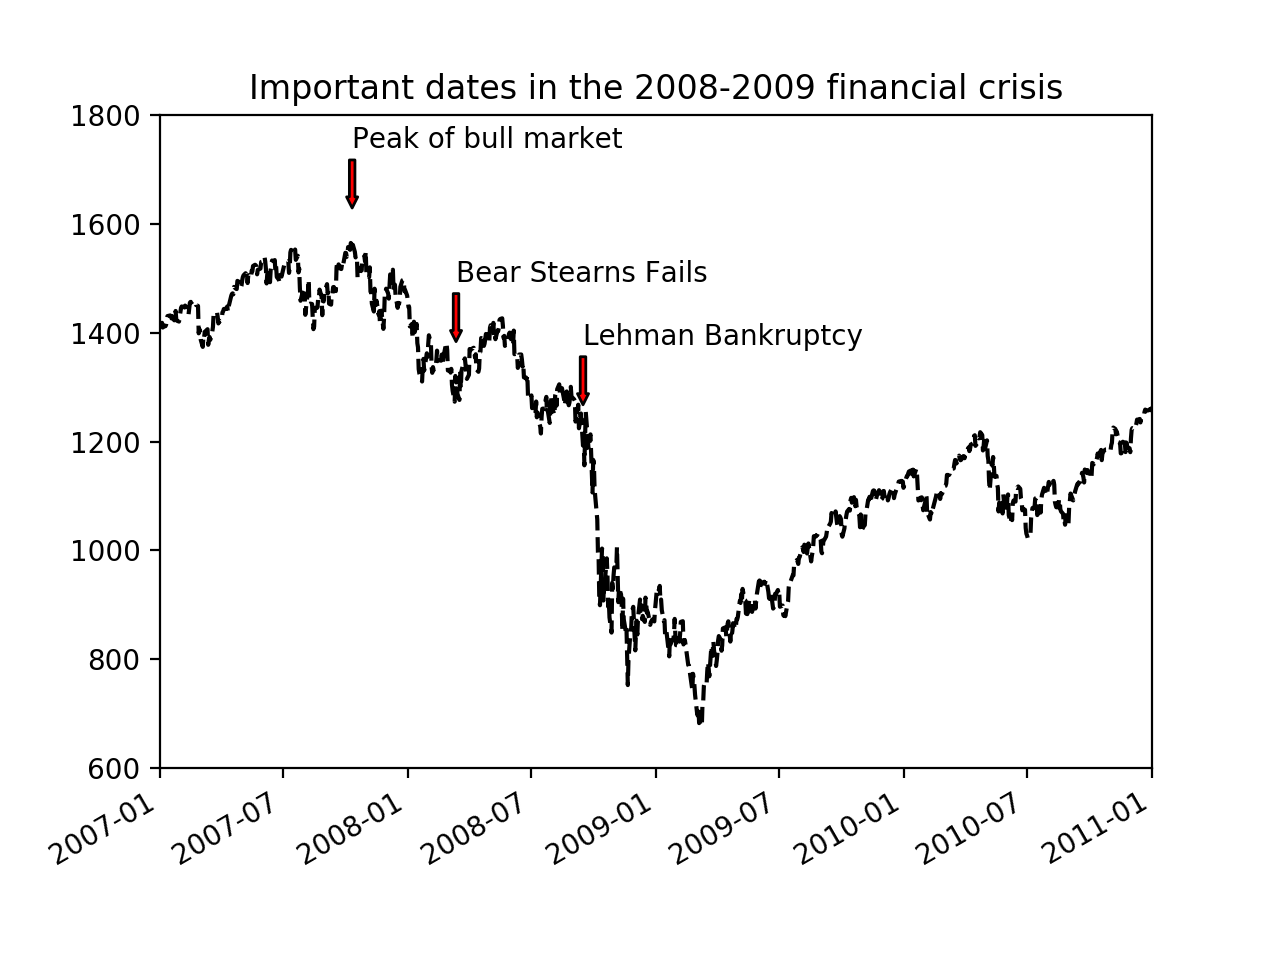

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [42]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k--')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

此图中有两个要点要突出显示：ax.annotate方法可以在指示的x和y坐标处绘制标签。我们使用set_xlim和set_ylim方法手动设置绘图的开始和结束边界，而不是使用matplotlib的默认边界。最后，ax.set_title将主标题添加到绘图中。

有关更多标注示例的信息，请参见在线matplotlib画廊。

绘制形状需要多加注意。matplotlib的对象代表许多常见的形状，称为补丁。其中的一些，例如Rectangle和Circle，可以在matplotlib.pyplot中找到，但完整的集合位于matplotlib.patches中。

要将图形添加到绘图中，请创建补丁对象shp并通过调用ax.add_patch（shp）将其添加到子绘图中（请参见图9-12）：

<IPython.core.display.Javascript object>


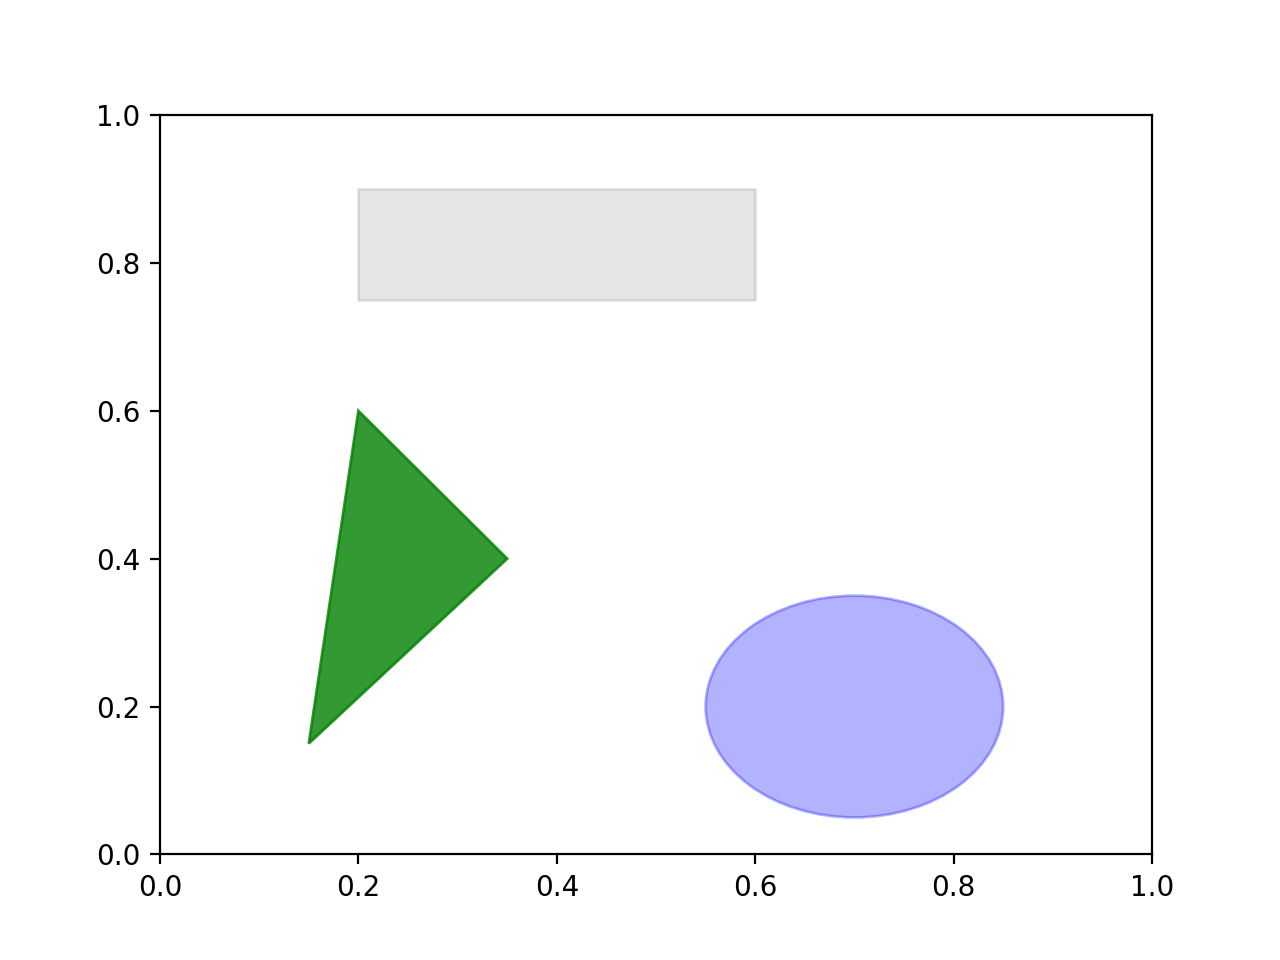

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.1)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.8)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

如果查看许多熟悉的图类型的实现，您会发现它们是由补丁组装而成的。

### 将绘图保存为文件

您可以使用plt.savefig将活动图形保存到文件中。此方法等效于图形对象的savefig实例方法。例如，要保存图形的SVG版本，只需键入：

```python
    plt.savefig('figpath.svg')
```

文件类型是从文件扩展名推断的。因此，如果您改用.pdf，则会得到PDF。我经常使用两个重要的选项来发布图形：dpi（用于控制每英寸点数的分辨率）和bbox_inches（可以在实际图形周围修剪空白）。要获得与PNG相同的图，并且在图周围且DPI为400 DPI时具有最小的空白，您可以执行以下操作：

```python
    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

savefig不必写入磁盘；它也可以写入任何类似文件的对象，例如BytesIO：

```python
    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()
```

有关savefig的其他一些选项的列表，请参见表9-2。

### matplotlib 配置项

matplotlib配置有配色方案和默认设置，主要用于准备要发布的图形。幸运的是，几乎所有的默认行为都可以通过一组广泛的全局参数来自定义，这些参数控制图形大小，子图间距，颜色，字体大小，网格样式等。从Python以编程方式修改配置的一种方法是使用rc方法。例如，要将全局默认图形大小设置为10×10，可以输入：

```python
    plt.rc('figure', figsize=(10, 10))
```

rc的第一个参数是您希望自定义的组件，例如“ figure”，“ axes”，“ xtick”，“ ytick”，“ grid”，“ legend”或许多其他组件。之后，可以跟随一系列指示新参数的关键字参数。写下程序中选项的一种简单方法是：

```python
    font_options = {'family': 'monospace',
                    'weight': 'bold',
                    'size': 'small'}
    plt.rc('font', **font_options)
```

为了进行更广泛的自定义并查看所有选项的列表，matplotlib随附了matplotlib/mpl-data目录中的配置文件matplotlibrc。如果您自定义此文件并将其放置在名为.matplotlibrc的主目录中，则每次使用matplotlib时都会加载该文件。

正如我们将在下一节中看到的那样，seaborn软件包具有几个内置的绘图主题或样式，这些主题或样式内部使用了matplotlib的配置系统。